In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data = pd.read_csv("Chennai house data.csv")
data.head()

price  area              status  bhk  bathroom  age    location  \
0   37.49   872       Ready to move    2       NaN  1.0   Sembakkam   
1   93.54  1346  Under Construction    3       2.0  NaN    Selaiyur   
2  151.00  2225  Under Construction    3       NaN  0.0   Mogappair   
3   49.00  1028       Ready to move    2       2.0  3.0    Ambattur   
4   42.28   588  Under Construction    2       1.0  0.0  Pallavaram   

                                builder  
0                         MP Developers  
1                         DAC Promoters  
2     Casagrand Builder Private Limited  
3                Dugar Housing Builders  
4  Radiance Realty Developers India Ltd

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [4]:
data['bathroom'].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.])

In [5]:
data['bathroom'].fillna(method = 'bfill', inplace = True)

In [6]:
data['bathroom'].unique()

array([2., 1., 3., 4., 5., 6., 7.])

In [7]:
data['age'].unique()

array([ 1., nan,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12.,
       16., 17.,  8., 32.])

In [8]:
data['age'].fillna(method = 'ffill', inplace = True)

In [9]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


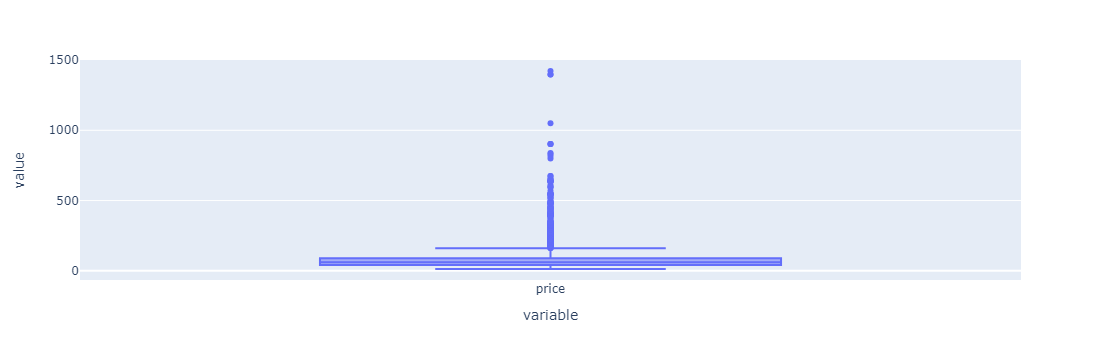

In [11]:
px.box(data['price'])

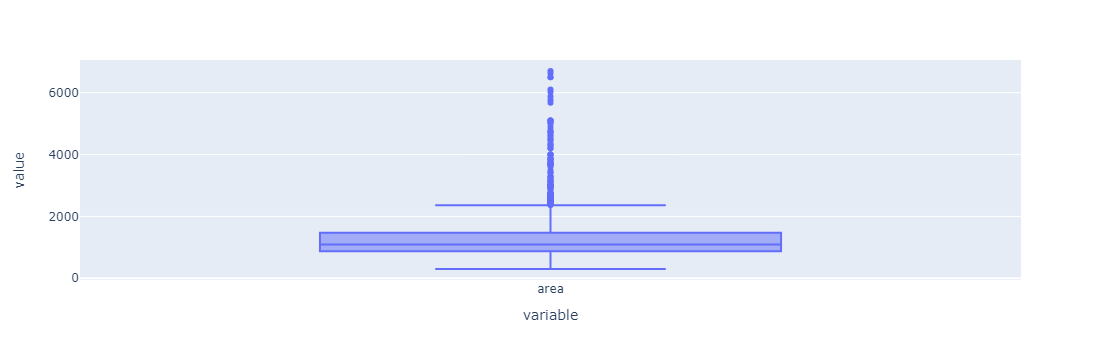

In [12]:
px.box(data['area'])

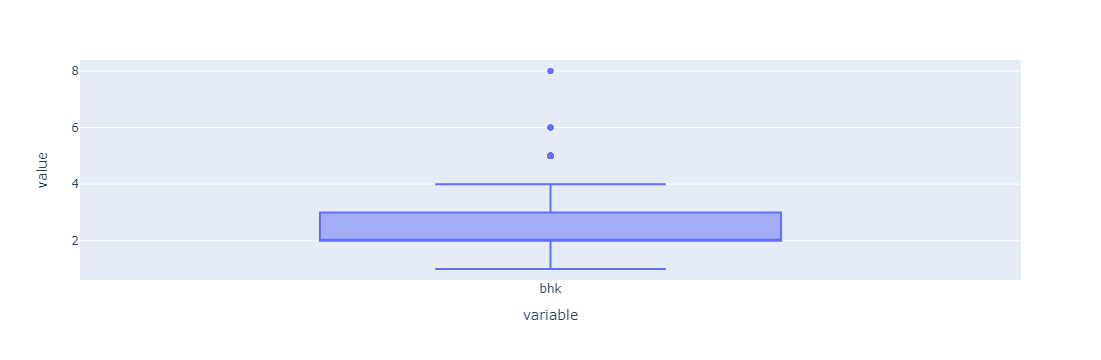

In [13]:
px.box(data['bhk'])

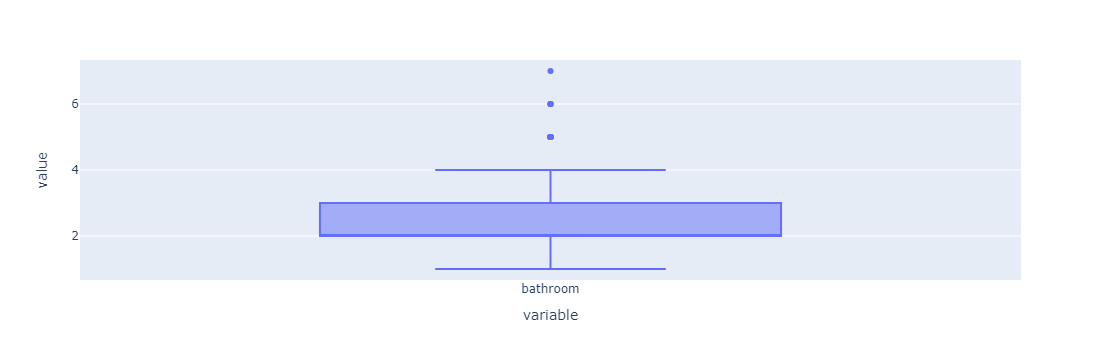

In [14]:
px.box(data['bathroom'])

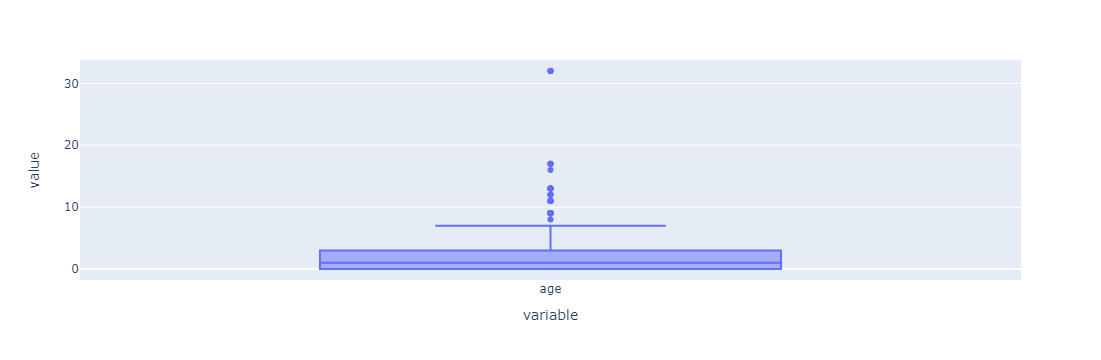

In [15]:
px.box(data['age'])

In [16]:
numcol = ['price', 'area', 'bhk', 'bathroom', 'age']

In [17]:
for col in numcol:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    print("column :",col)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    # Define bounds
    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(lbound,ubound)
    # Replace outliers with the respective bounds
    data[col] = np.where(data[col] > ubound, ubound, 
                            np.where(data[col] < lbound, lbound, data[col]))

column : price
42.0 90.0 48.0
-30.0 162.0
column : area
877.0 1471.25 594.25
-14.375 2362.625
column : bhk
2.0 3.0 1.0
0.5 4.5
column : bathroom
2.0 3.0 1.0
0.5 4.5
column : age
0.0 3.0 3.0
-4.5 7.5


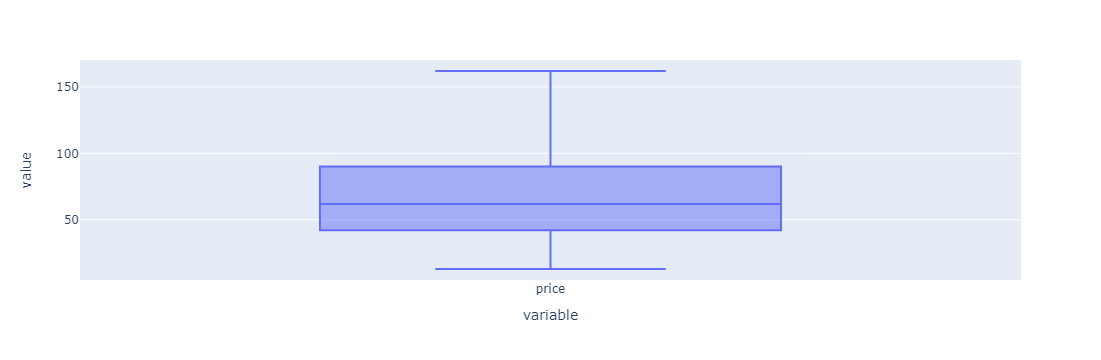

In [18]:
px.box(data['price'])

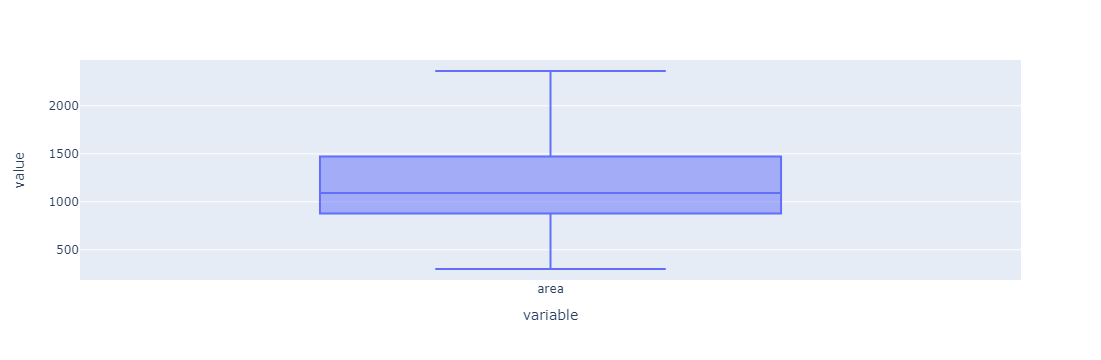

In [19]:
px.box(data['area'])

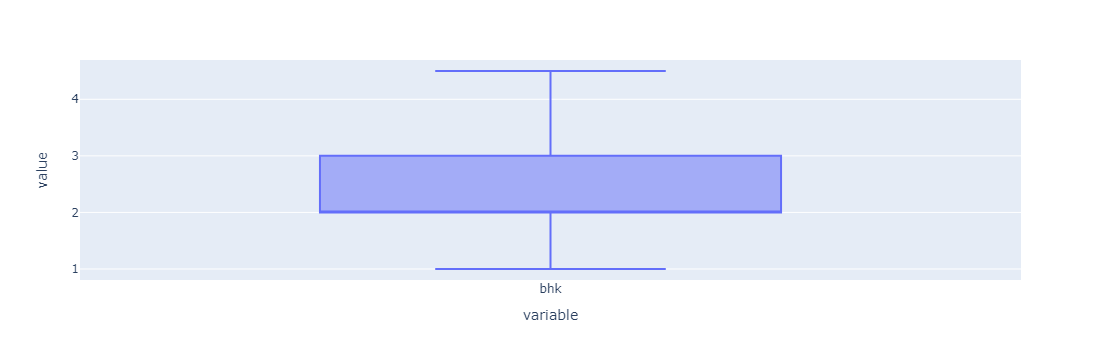

In [20]:
px.box(data['bhk'])

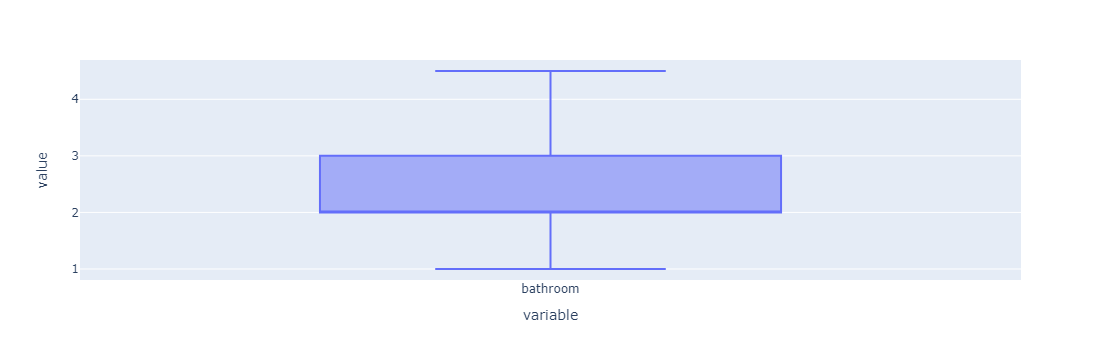

In [21]:
px.box(data['bathroom'])

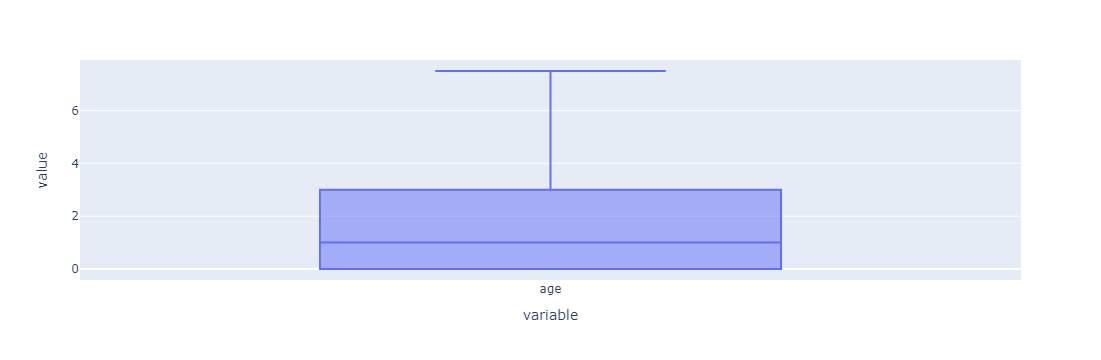

In [22]:
px.box(data['age'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   float64
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   float64
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(5), object(3)
memory usage: 163.9+ KB


In [24]:
data["status"] = data["status"].map({'Under Construction':0,'Ready to move':1})

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["location"] = le.fit_transform(data["location"])
data["builder"] = le.fit_transform(data["builder"])
data.head()

price    area  status  bhk  bathroom  age  location  builder
0   37.49   872.0       1  2.0       2.0  1.0       137       60
1   93.54  1346.0       0  3.0       2.0  1.0       136       20
2  151.00  2225.0       0  3.0       2.0  0.0        82       18
3   49.00  1028.0       1  2.0       2.0  3.0         5       26
4   42.28   588.0       0  2.0       1.0  0.0       105       88

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['price']
X = scaler.fit_transform(data.drop(columns = ['price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['price']).columns)
X.head()

area   status       bhk  bathroom       age  location   builder
0 -0.729629  0.87289 -0.566140 -0.444498 -0.389083  0.768583 -0.233426
1  0.248971 -1.14562  0.762375 -0.444498 -0.389083  0.748789 -1.127770
2  2.063716 -1.14562  0.762375 -0.444498 -0.888298 -0.320079 -1.172488
3 -0.407558  0.87289 -0.566140 -0.444498  0.609347 -1.844205 -0.993619
4 -1.315963 -1.14562 -0.566140 -1.832559 -0.888298  0.135180  0.392616

In [27]:
X.corr()

area    status       bhk  bathroom       age  location   builder
area      1.000000  0.036905  0.839627  0.463652 -0.015512 -0.040621 -0.061380
status    0.036905  1.000000  0.015683  0.050069  0.558468  0.045159  0.147393
bhk       0.839627  0.015683  1.000000  0.521872 -0.025361 -0.052221 -0.035444
bathroom  0.463652  0.050069  0.521872  1.000000 -0.031052  0.017191 -0.044015
age      -0.015512  0.558468 -0.025361 -0.031052  1.000000 -0.054896  0.391375
location -0.040621  0.045159 -0.052221  0.017191 -0.054896  1.000000  0.066975
builder  -0.061380  0.147393 -0.035444 -0.044015  0.391375  0.066975  1.000000

In [28]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2358, 7), (262, 7), (2358,), (262,))

In [29]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
model = lr.fit(x_train,y_train)

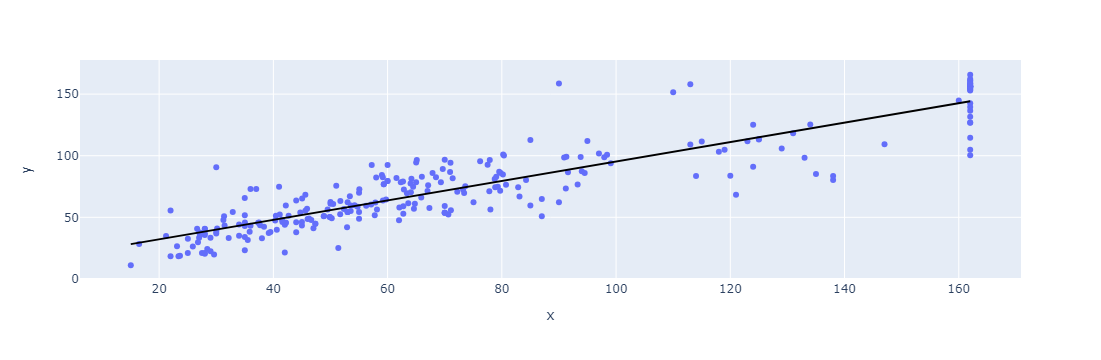

In [30]:
predictions1 = lr.predict(x_test)
px.scatter(x = y_test,y = predictions1 ,trendline = 'ols', trendline_color_override="black")

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions1) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions1) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions1,squared=False)
accuracy  = lr.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 12.881230372134363 
 MSE: 324.0551721416545 
 RMSE: 18.00153249425322 
 Accuracy: 81.03388659669085


In [32]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=3, include_bias=False)
pf=PF.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(pf,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2358, 119), (262, 119), (2358,), (262,))

In [34]:
from sklearn.linear_model import LinearRegression 
pr = LinearRegression()
model = pr.fit(x_train,y_train)

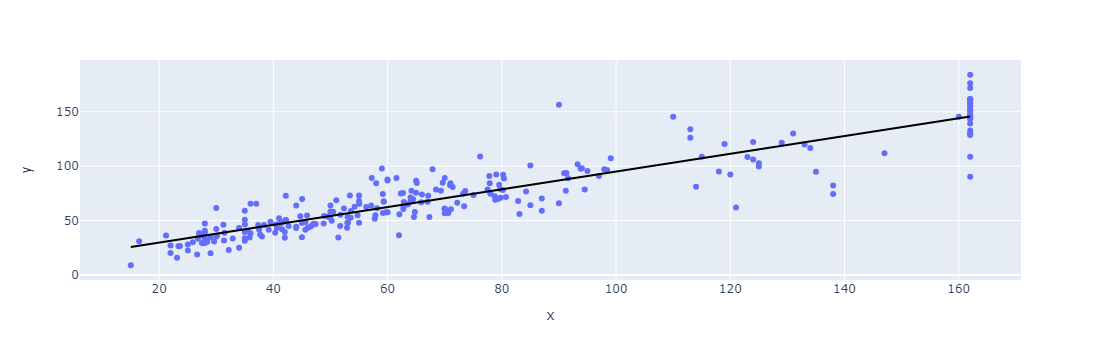

In [35]:
predictions2 = pr.predict(x_test)
px.scatter(x = y_test,y = predictions2 ,trendline = 'ols', trendline_color_override="black")

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions2) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions2) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions2,squared=False)
accuracy  = pr.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 11.265149093511452 
 MSE: 265.20622655299536 
 RMSE: 16.285153562462817 
 Accuracy: 84.47816359533658


In [37]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2358, 7), (262, 7), (2358,), (262,))

In [38]:
from sklearn.linear_model import Ridge 
rimo = Ridge(alpha =0.5, tol = 0.01,solver ='auto', random_state = 100) 
rimo.fit(x_train, y_train)

Ridge(alpha=0.5, random_state=100, tol=0.01)

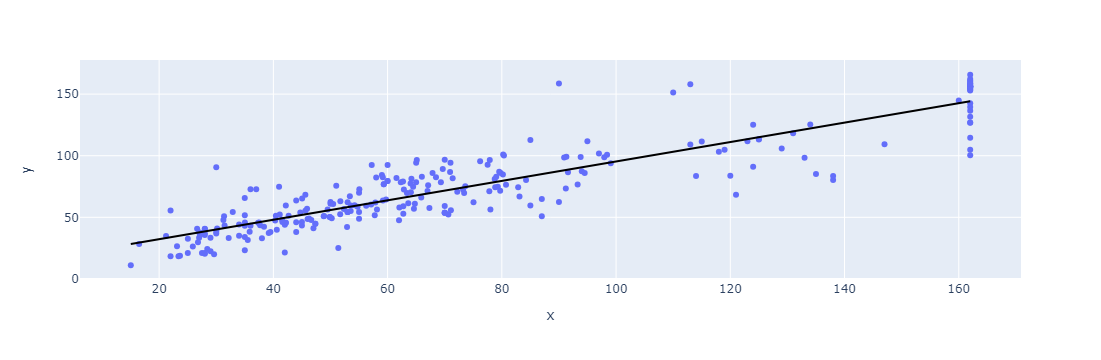

In [39]:
predictions3 = rimo.predict(x_test)
px.scatter(x = y_test,y = predictions3 ,trendline = 'ols', trendline_color_override="black")

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions3) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions3) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions3,squared=False)
accuracy  = rimo.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 12.883522964256779 
 MSE: 324.05899715302274 
 RMSE: 18.001638735210268 
 Accuracy: 81.03366272864116


In [41]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2358, 7), (262, 7), (2358,), (262,))

In [42]:
from sklearn.linear_model import ElasticNet as en
enmo = en(alpha = 1.0, tol = 0.001, random_state = 100) 
enmo.fit(x_train, y_train)

ElasticNet(random_state=100, tol=0.001)

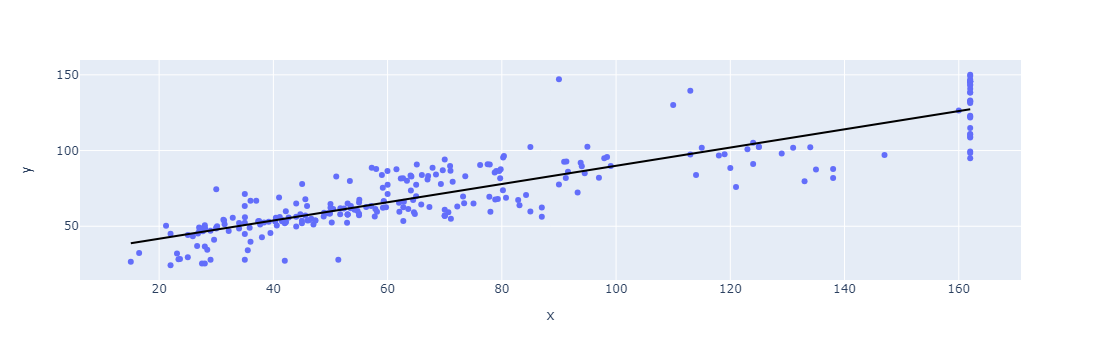

In [43]:
predictions4 = enmo.predict(x_test)
px.scatter(x = y_test,y = predictions4 ,trendline = 'ols', trendline_color_override="black")

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions4) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions4) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions4,squared=False)
accuracy  = enmo.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 16.73199129968725 
 MSE: 441.6203685720944 
 RMSE: 21.014765489343304 
 Accuracy: 74.15309888068012


In [45]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2358, 7), (262, 7), (2358,), (262,))

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
lrboost1 = AdaBoostRegressor(n_estimators=50,estimator=lr,learning_rate=1.0,loss='linear')
lrboost1.fit(x_train,y_train)

AdaBoostRegressor(estimator=LinearRegression())

In [47]:
lrboost2 = GradientBoostingRegressor(init= lr,n_estimators=100, random_state=100)
lrboost2.fit(x_train,y_train)

GradientBoostingRegressor(init=LinearRegression(), random_state=100)

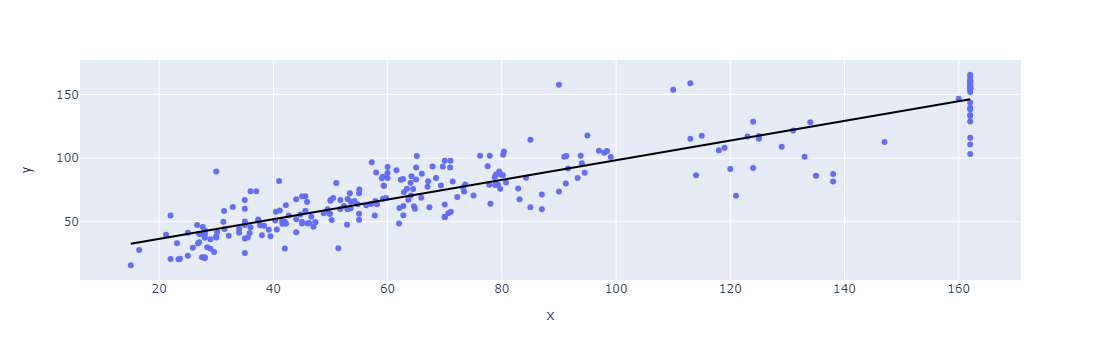

In [48]:
predictions5 = lrboost1.predict(x_test)
px.scatter(x = y_test,y = predictions5 ,trendline = 'ols', trendline_color_override="black")

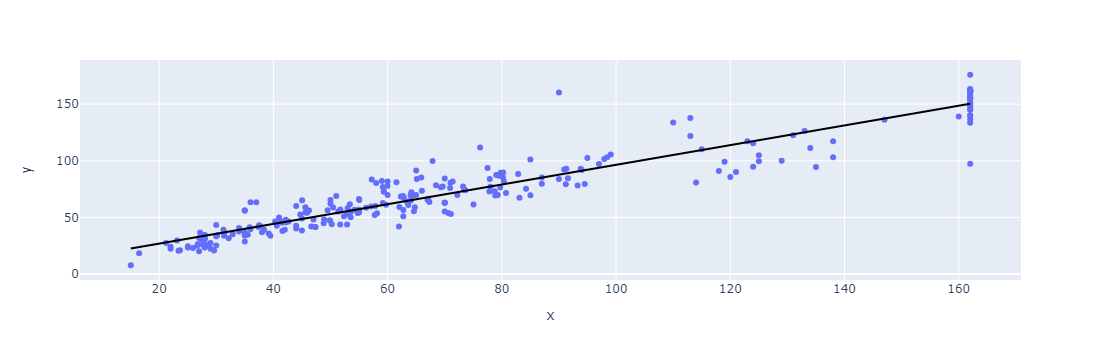

In [49]:
predictions6 = lrboost2.predict(x_test)
px.scatter(x = y_test,y = predictions6 ,trendline = 'ols', trendline_color_override="black")

In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions5) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions5) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions5,squared=False)
accuracy  = lrboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 13.945445594730103 
 MSE: 346.1726135981863 
 RMSE: 18.605714541457047 
 Accuracy: 79.7394097948447


In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions6) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions6) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions6,squared=False)
accuracy  = lrboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 9.056080496346636 
 MSE: 174.80700938111352 
 RMSE: 13.221460183395536 
 Accuracy: 89.7689966134339


In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
prboost1 = AdaBoostRegressor(n_estimators=50,estimator=pr,learning_rate=1.0,loss='linear')
prboost1.fit(x_train,y_train)


AdaBoostRegressor(estimator=LinearRegression())

In [53]:
prboost2 = GradientBoostingRegressor(init= pr,n_estimators=100, random_state=100)
prboost2.fit(x_train,y_train)

GradientBoostingRegressor(init=LinearRegression(), random_state=100)

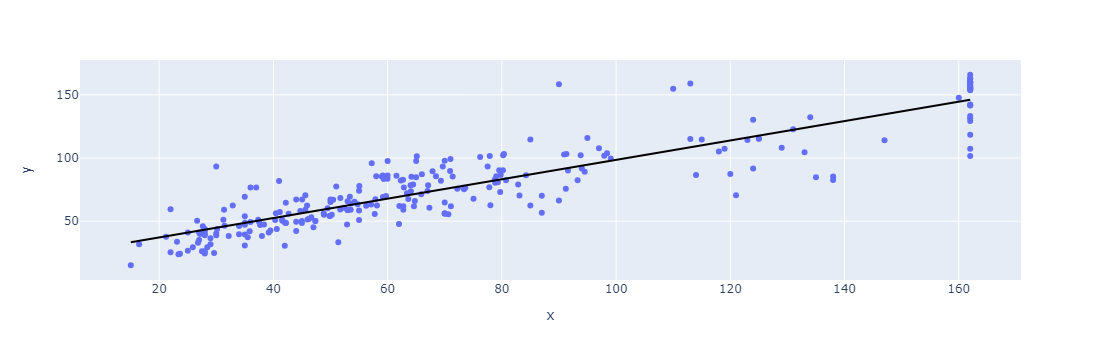

In [54]:
predictions7 = prboost1.predict(x_test)
px.scatter(x = y_test,y = predictions7 ,trendline = 'ols', trendline_color_override="black")

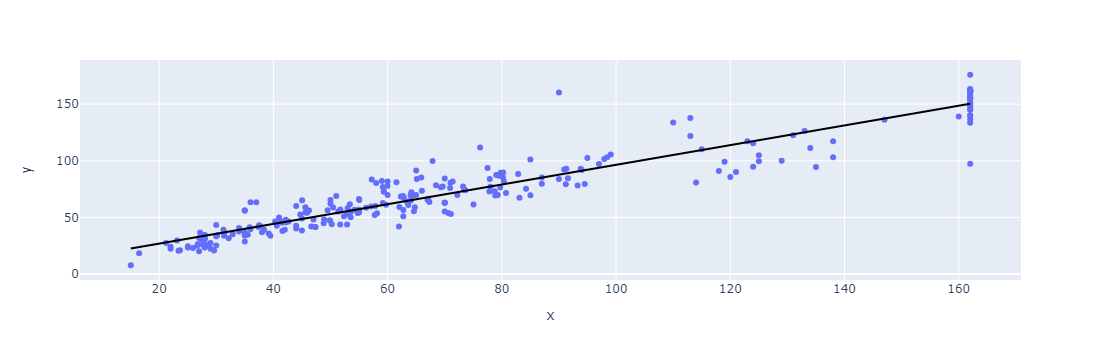

In [55]:
predictions8 = prboost2.predict(x_test)
px.scatter(x = y_test,y = predictions8 ,trendline = 'ols', trendline_color_override="black")

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions7) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions7) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions7,squared=False)
accuracy  = prboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 13.943296673950277 
 MSE: 353.4474828878305 
 RMSE: 18.80019901192087 
 Accuracy: 79.31363045909218


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions8) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions8) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions8,squared=False)
accuracy  = prboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 9.056080496346636 
 MSE: 174.80700938111352 
 RMSE: 13.221460183395536 
 Accuracy: 89.7689966134339


In [58]:
riboost1 = AdaBoostRegressor(n_estimators=50,estimator=rimo,learning_rate=1.0,loss='linear')
riboost1.fit(x_train,y_train)

AdaBoostRegressor(estimator=Ridge(alpha=0.5, random_state=100, tol=0.01))

In [59]:
riboost2 = GradientBoostingRegressor(init= rimo,n_estimators=100, random_state=100)
riboost2.fit(x_train,y_train)

GradientBoostingRegressor(init=Ridge(alpha=0.5, random_state=100, tol=0.01),
                          random_state=100)

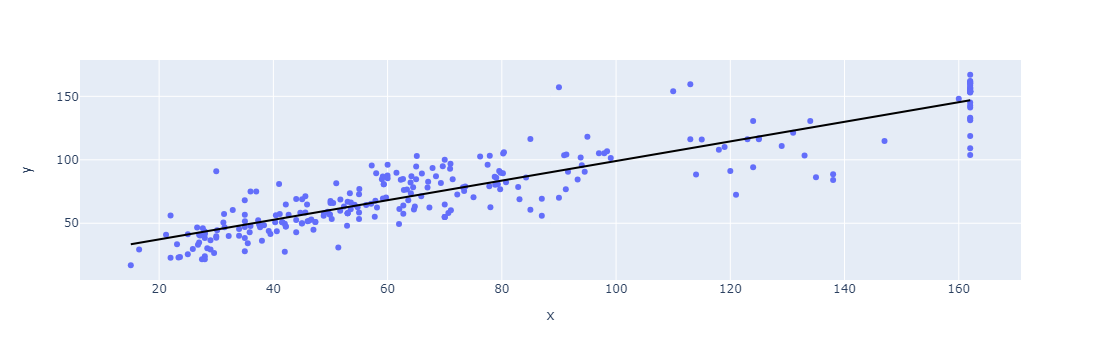

In [60]:
predictions9 = riboost1.predict(x_test)
px.scatter(x = y_test,y = predictions9 ,trendline = 'ols', trendline_color_override="black")

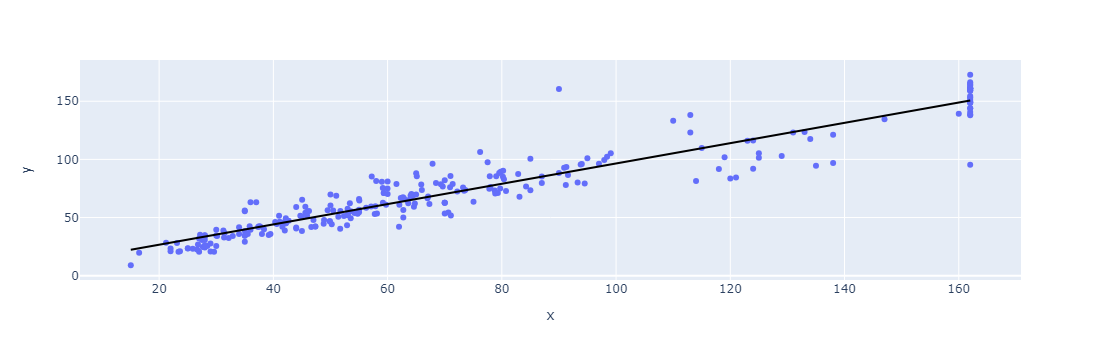

In [61]:
predictions10 = riboost2.predict(x_test)
px.scatter(x = y_test,y = predictions10 ,trendline = 'ols', trendline_color_override="black")

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions9) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions9) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions9,squared=False)
accuracy  = riboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 14.263247597846256 
 MSE: 353.8850726167706 
 RMSE: 18.811833313549496 
 Accuracy: 79.28801946091446


In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions10) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions10) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions10,squared=False)
accuracy  = riboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 8.829223232011527 
 MSE: 169.81714964442625 
 RMSE: 13.031390932836995 
 Accuracy: 90.06104023368277


In [64]:
enboost1 = AdaBoostRegressor(n_estimators=50,estimator=enmo,learning_rate=1.0,loss='linear')
enboost1.fit(x_train,y_train)

AdaBoostRegressor(estimator=ElasticNet(random_state=100, tol=0.001))

In [65]:
enboost2 = GradientBoostingRegressor(n_estimators=50,init=enmo,learning_rate=1.0,loss='squared_error')
enboost2.fit(x_train,y_train)

GradientBoostingRegressor(init=ElasticNet(random_state=100, tol=0.001),
                          learning_rate=1.0, n_estimators=50)

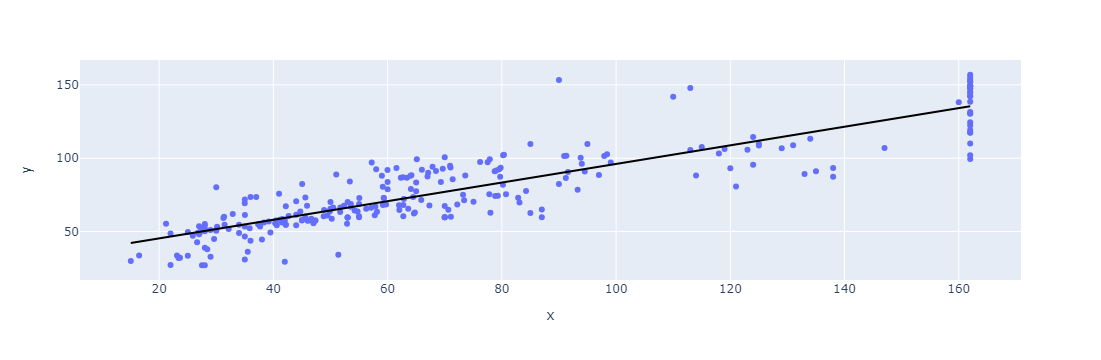

In [73]:
predictions11 = enboost1.predict(x_test)
px.scatter(x = y_test,y = predictions11 ,trendline = 'ols', trendline_color_override="black")


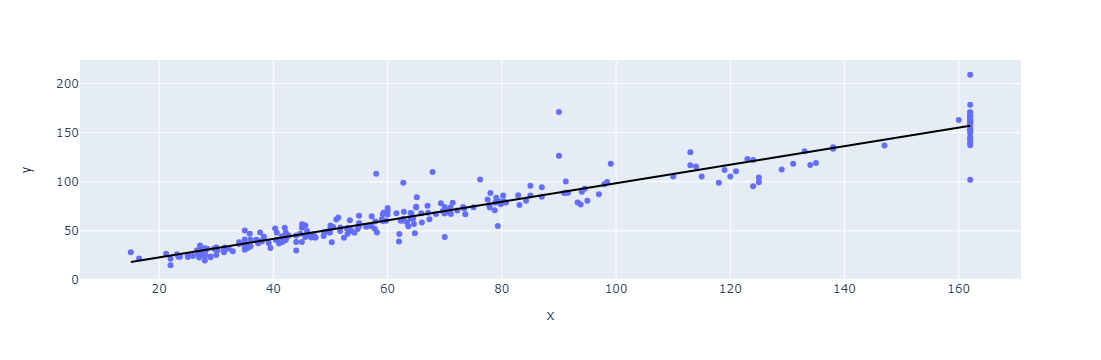

In [67]:
predictions12 = enboost2.predict(x_test)
px.scatter(x = y_test,y = predictions12 ,trendline = 'ols', trendline_color_override="black")

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions11) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions11) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions11,squared=False)
accuracy  = enboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 17.689341038691076 
 MSE: 450.9539964266354 
 RMSE: 21.235677442140513 
 Accuracy: 73.60682571619526


In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions12) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions12) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions12,squared=False)
accuracy  = enboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

MAE: 6.95162812138445 
 MSE: 139.4465956609548 
 RMSE: 11.808750808656892 
 Accuracy: 91.83855042481791
